## Goodreads project
- date: 25/08/2023
 - **Author**: 
     - Souheil Maatoug
     - Hugues Delattre
     - Ricardo Requena Delon
     - Yulu Wang
     - Laurence James
- subject: First attempt in selecting features and training a classification model (logistic regression)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("../data/books_analysis_output.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bookID               11044 non-null  int64  
 1   title                11044 non-null  object 
 2   authors              11044 non-null  object 
 3   average_rating       11044 non-null  float64
 4   isbn                 11044 non-null  object 
 5   isbn13               11044 non-null  int64  
 6   language_code        11044 non-null  object 
 7   num_pages            11044 non-null  int64  
 8   ratings_count        11044 non-null  int64  
 9   text_reviews_count   11044 non-null  int64  
 10  publication_date     11044 non-null  object 
 11  publisher            11044 non-null  object 
 12  number of authors    11044 non-null  int64  
 13  publication_correct  11044 non-null  object 
 14  publication_year     11044 non-null  int64  
 15  publication_month    11044 non-null 

### Features

features to be considered in the model: 
- language_code
- num_pages
- ratings_count
- text_reviews_count
- publication_year
- publication_month

target attribute:
- average_rating

### 1. language_code

<Axes: title={'center': 'distribution of language code'}, ylabel='occurrences'>

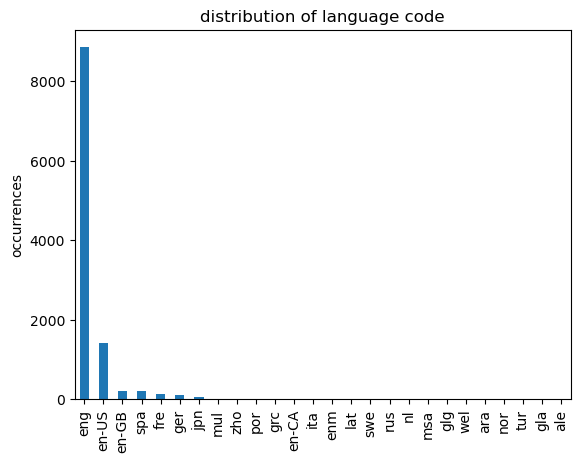

In [4]:
dataset["language_code"].value_counts().plot.bar(title="distribution of language code", ylabel="occurrences")

- The values of the attribute `language_code` are imbalanced !
- the majority of books is written in english language

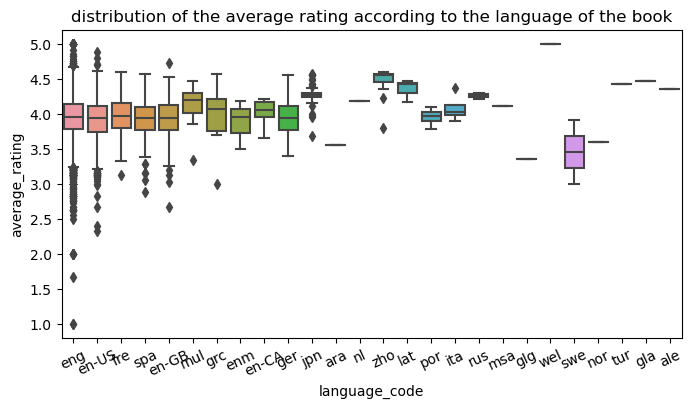

In [5]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=dataset, x="language_code", y="average_rating")
plt.xticks(rotation=25)
plt.title("distribution of the average rating according to the language of the book")
plt.show()

#### Observations
- rare observations for some values of the attribute language_code: the dataset contains only few examples of books written in languages different from english
- one way to tackle this imbalanced data is to group the data by `english` and `world` for the rest of the languages 

In [6]:
def language_category(lan_code: str):
    """convert language code in english or world"""
    if lan_code in ("eng", "en-US", "en-GB", "en-CA"):
        return "english"
    else:
        return "world"

In [7]:
dataset["language"] = dataset["language_code"].apply(language_category)

<Axes: title={'center': 'distribution of language code'}, ylabel='occurrences'>

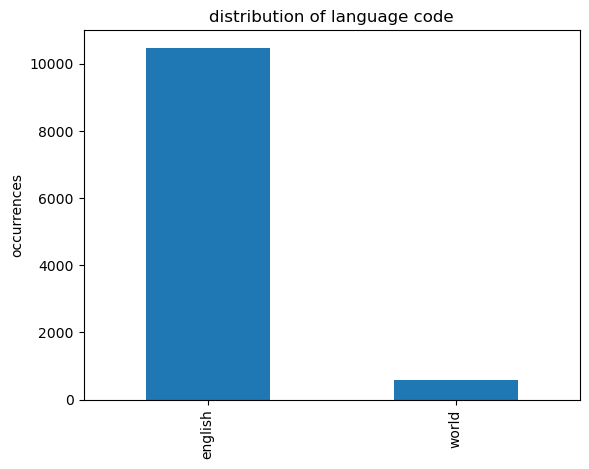

In [8]:
dataset["language"].value_counts().plot.bar(title="distribution of language code", ylabel="occurrences")

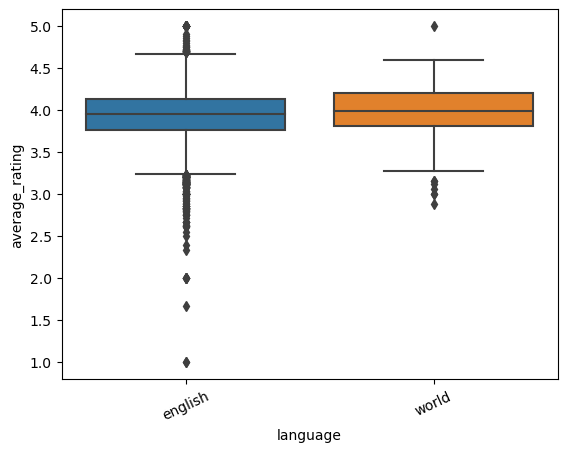

In [9]:
# plt.figure(figsize=(10, 4))
sns.boxplot(data=dataset, x="language", y="average_rating")
plt.xticks(rotation=25)
plt.show()

#### observations
- we see that there is an important difference in the count of the values of the language attribute
- on the other hand, we can see that the distributions of both values are quite close (except some low values in the english label).
- the question is: should we keep this attribute or drop from the list of features to be used in the model ? is the language of the book an indicator of its rating ? 

### 2. Number of pages

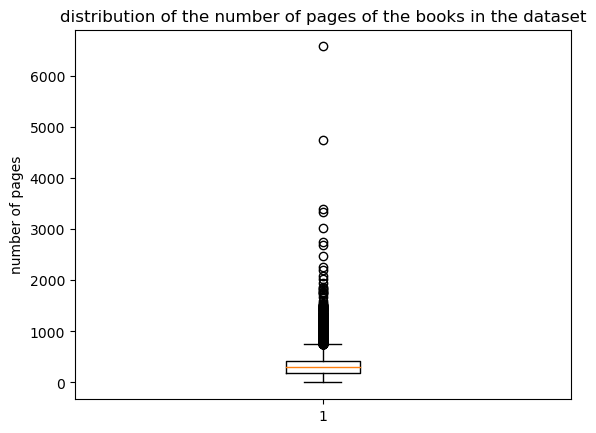

In [10]:
plt.figure()
plt.boxplot(dataset["num_pages"])
plt.title("distribution of the number of pages of the books in the dataset")
plt.ylabel("number of pages")
plt.show()

is there books with 0 number of pages ?

In [11]:
dataset[dataset["num_pages"]==0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number of authors,publication_correct,publication_year,publication_month,language
304,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers,1,2005-01-01,2005,1,english
846,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media,2,2003-01-01,2003,1,english
1052,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio,1,2006-10-03,2006,10,english
1055,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio,1,2003-10-01,2003,10,english
1220,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio,2,2006-03-28,2006,3,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media,2,2005-01-01,2005,1,english
10119,41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing,1,1995-11-19,1995,11,english
10546,43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio,2,1999-12-01,1999,12,english
10845,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,eng,0,21,1,10/12/1981,Ivy Books,1,1981-10-12,1981,10,english


#### Observations
- we can see that many books with 0 number of pages are juste audio versions of a particular book. The average rating was duplicated from the one of the original version.
- those anomalies in the dataset represent 75 lines
- should we keep those lines ?? 

in the sake of simplicity, we decide to drop those lines

In [12]:
dataset = dataset[~(dataset["num_pages"]==0)]

### 3. ratings_count 

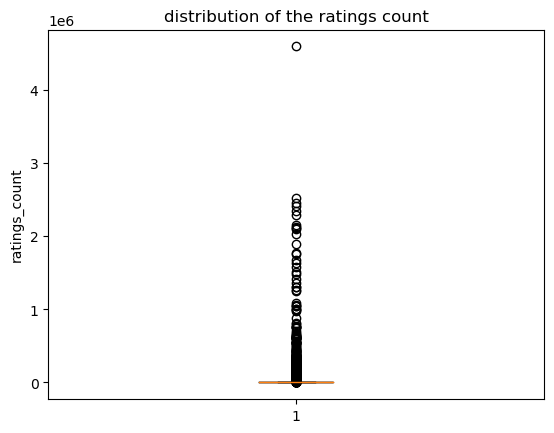

In [13]:
plt.figure()
plt.boxplot(dataset["ratings_count"])
plt.title("distribution of the ratings count")
plt.ylabel("ratings_count")
plt.show()

Text(0.5, 1.0, 'average rating according to the ratings count')

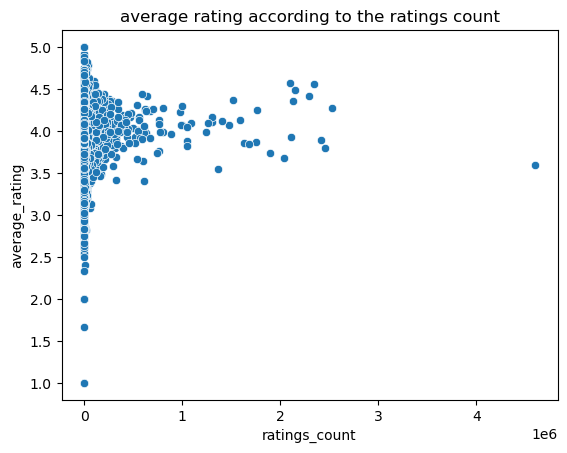

In [14]:
plt.figure()
sns.scatterplot(data=dataset, x="ratings_count", y="average_rating")
plt.title("average rating according to the ratings count")

#### observations
- we observe some outliers (values higher than 1e6)
- should we keep them or remove them ?

In [15]:
dataset_slice = dataset.loc[dataset["ratings_count"] < 0.5e6]

Text(0.5, 1.0, 'average rating according to the ratings count')

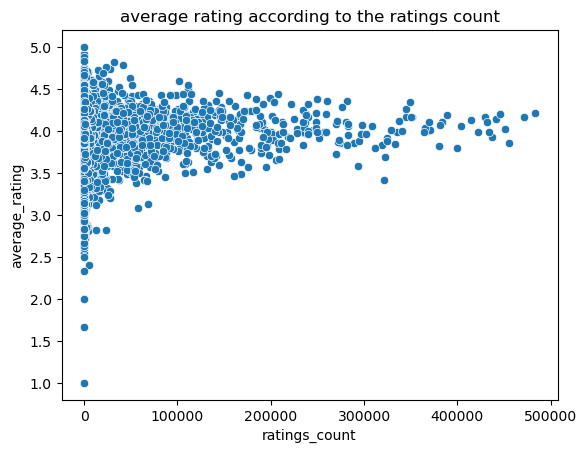

In [16]:
plt.figure()
sns.scatterplot(data=dataset_slice, x="ratings_count", y="average_rating")
plt.title("average rating according to the ratings count")

- we decide to remove the outliers

### 4. text reviews count

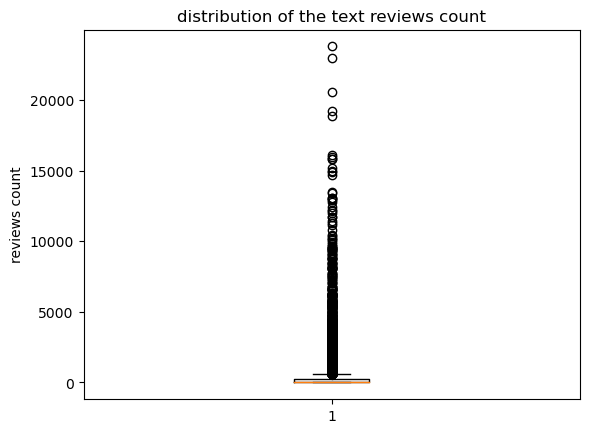

In [17]:
plt.figure()
plt.boxplot(dataset_slice["text_reviews_count"])
plt.title("distribution of the text reviews count")
plt.ylabel("reviews count")
plt.show()

Text(0.5, 1.0, 'average rating according to the reviews count')

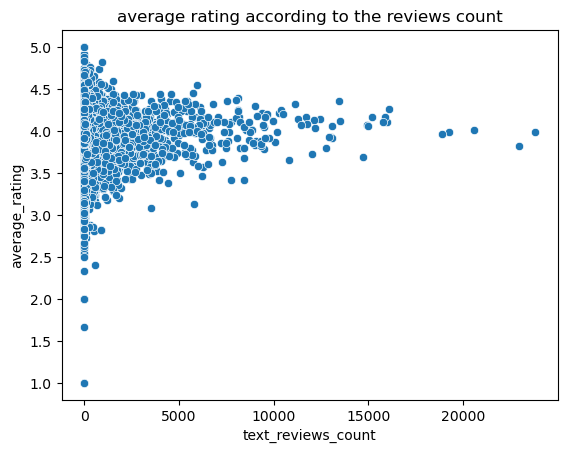

In [18]:
plt.figure()
sns.scatterplot(data=dataset_slice, x="text_reviews_count", y="average_rating")
plt.title("average rating according to the reviews count")

- we can slice some outliers

In [19]:
dataset_sliced = dataset_slice.loc[dataset_slice["text_reviews_count"] < 1500]

Text(0.5, 1.0, 'average rating according to the reviews count')

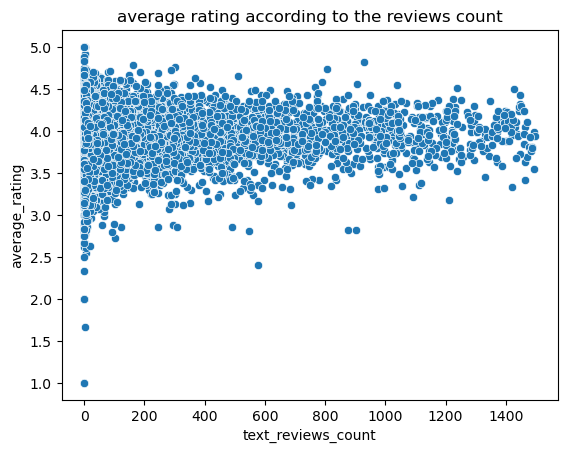

In [20]:
plt.figure()
sns.scatterplot(data=dataset_sliced, x="text_reviews_count", y="average_rating")
plt.title("average rating according to the reviews count")

### 5. publication year

In [21]:
#dataset_sliced["publication_year"] = pd.to_datetime(dataset_sliced["publication_year"])
dataset_sliced["publication_year"] = dataset_sliced["publication_year"]

C:\Users\hdela\AppData\Local\Temp\ipykernel_22248\1530074131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sliced["publication_year"] = dataset_sliced["publication_year"]


<Axes: xlabel='publication_year', ylabel='average_rating'>

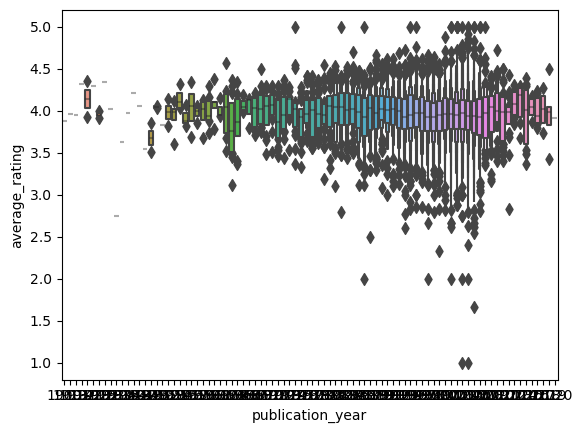

In [22]:
sns.boxenplot(data=dataset_sliced, x="publication_year", y="average_rating")

- we cannot say that the average rating is influenced by the year of publication

In [23]:
#dataset_sliced["publication_month"] = pd.to_datetime(dataset_sliced["publication_month"])
dataset_sliced["publication_month"] = dataset_sliced["publication_month"]

C:\Users\hdela\AppData\Local\Temp\ipykernel_22248\1228904009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sliced["publication_month"] = dataset_sliced["publication_month"]


<Axes: xlabel='publication_month', ylabel='average_rating'>

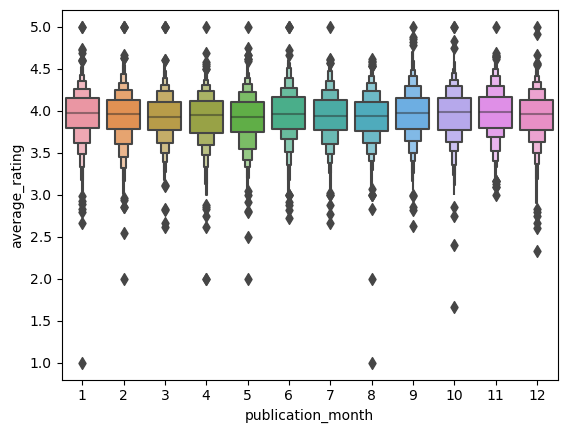

In [24]:
#dataset_sliced.plot(x="publication_month", y="average_rating")
sns.boxenplot(data=dataset_sliced, x="publication_month", y="average_rating")

Equally, we cannot infer that the average_rating is influenced by the month of publication

In [25]:
dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'number of authors',
       'publication_correct', 'publication_year', 'publication_month',
       'language'],
      dtype='object')

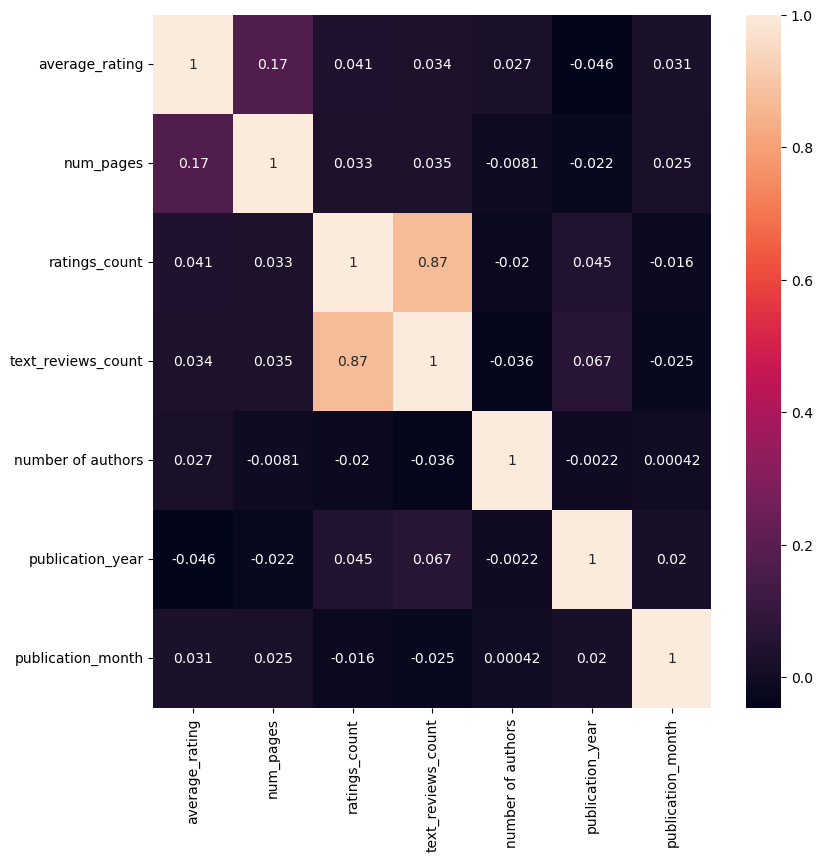

In [26]:
#sns.heatmap(dataset.corr(),annot=False)
plt.figure(figsize=(9,9))
sns.heatmap(
    dataset[["average_rating", "num_pages", "ratings_count", "text_reviews_count", "number of authors", "publication_year", "publication_month"]].corr(),annot=True)
plt.show()

### conclusion on features
we decide to keep the following features
- number of pages
- rating counts
- text review counts

What should the model be ? 
With all the informations we have gathered so far we can go for a safe:

**Input**("num_pages", "ratings_count", "text_reviews_count") --> **Output**("Average_Rating")

We can add to the input some publication month/publication year and number of authors to test out other possibilities

In [27]:
dataset_model = dataset_sliced[["num_pages", "ratings_count", "text_reviews_count", "average_rating"]]

### definition of classes: data binning
- (1-2): class 1
- )2-3): class 2
- )3,4): class 3
- )4,5): class 4

In [28]:
df_features = dataset_model[["num_pages", "ratings_count", "text_reviews_count"]]
df_target = dataset_model[["average_rating"]]

In [29]:
df_target

,average_rating
2,4.42
4,4.78
5,3.74
6,4.73
7,4.38
...,...
11039,4.06
11040,4.08
11041,3.96
11042,3.72


In [30]:
bins = [0, 2, 3, 4, 5]
labels = [1, 2, 3, 4]
target_y = pd.cut(df_target["average_rating"], bins, labels=labels)

Text(0.5, 1.0, 'counts of each class')

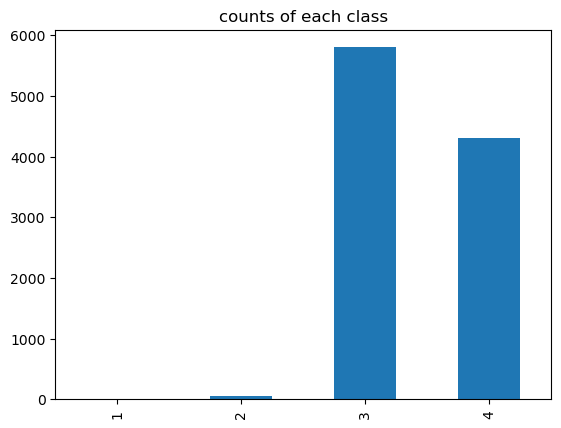

In [31]:
plt.figure()
pd.value_counts(target_y).sort_index().plot(kind="bar")
plt.title("counts of each class")

This distribution seems rather flawed, we can decompose it into another more centered distribution

In [32]:
df_features = dataset_model[["num_pages", "ratings_count", "text_reviews_count"]]
df_target = dataset_model[["average_rating"]]

In [33]:
bins = [0, 3.5, 3.75, 4, 4.25, 5]
labels = [1, 2, 3, 4, 5]
target_y = pd.cut(df_target["average_rating"], bins, labels=labels)


Text(0.5, 1.0, 'counts of each class')

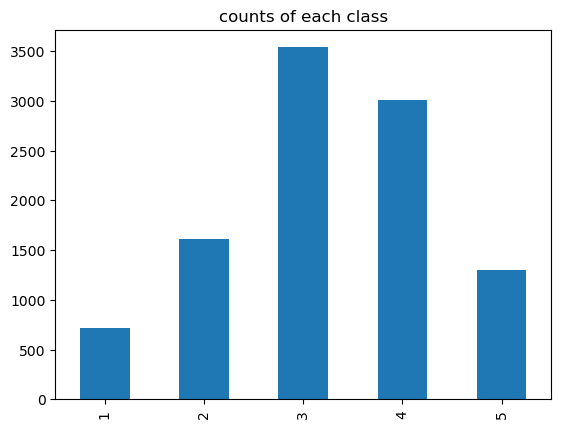

In [34]:
plt.figure()
pd.value_counts(target_y).sort_index().plot(kind="bar")
plt.title("counts of each class")

Here the categories are a bit more even, we have decomposed the notes into 5 different "new grades" which includes:

**1=[0-3.5]**
**2=[3.5-3.75]**
**3=[3.75-4]**
**4=[4-4.25]**
**5=[4.25-5]**

Although those categories are a bit more fair, it's still rather uneven with the smallest categorie containing 5 times less then the biggest

#### Observations
- we can clearly see that the classes are still imbalanced


### split in train and test

think about shuffling / stratified split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features.values, target_y, test_size=.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [37]:
y_predicted = clf.predict(X_test)

### metrics

In [38]:
(y_predicted == y_test).sum()/len(y_test)

0.35577395577395576

In [39]:
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.1425061425061425
R-squared: 0.02512087666644558


In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

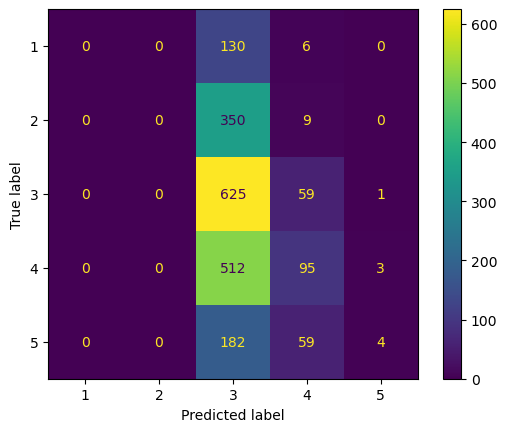

In [41]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

clearly, we can see here that the classes 1 and 2 that have few values, have wrong classifications. This result is normal but it is necessary to balance the data in order to make a classification
- we could use https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

## Second Conclusion
We now have:
Mean Squared Error: 1.1425061425061425
R-squared: 0.02512087666644558


### Our new model is more reasonnable and less precise but potentially more versatile.




**exploratory conclusion**


In [42]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smoted, y_smoted = oversample.fit_resample(X_train, y_train)

In [43]:
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_smoted, y_smoted)
y_predicted = clf.predict(X_test)
(y_predicted == y_test).sum()/len(y_test)


0.16707616707616707

In [44]:
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.8
R-squared: -2.242468929349839


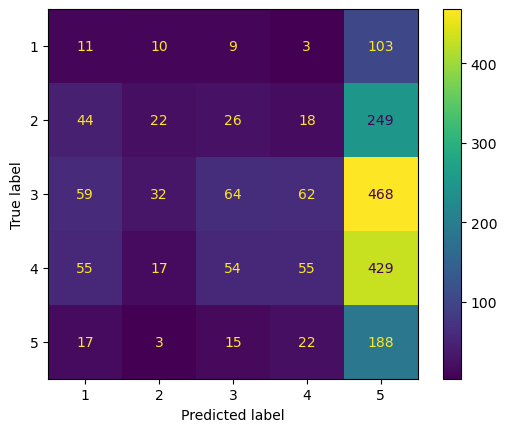

In [45]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()